# Predicting Churn for Bank Customers

## Data Collection


### Load Essential Module


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

label_size = 17

plt.rcParams['axes.labelsize'] = label_size
plt.rcParams['xtick.labelsize'] = label_size - 2
plt.rcParams['ytick.labelsize'] = label_size - 2
plt.rcParams['axes.titlesize'] = label_size
plt.rcParams['legend.fontsize'] = label_size - 2


C:\Users\SPASI\anaconda3\envs\spasi_nlp\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\SPASI\anaconda3\envs\spasi_nlp\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\SPASI\anaconda3\envs\spasi_nlp\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### Load Dataset






In [ ]:
# kalo mau gunain colab pakee cara dibawah ini

from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['Churn_Modelling.csv']))

Saving Churn_Modelling.csv to Churn_Modelling (2).csv


In [234]:
# kalo mau nge run nya pake jupyter lab di komputer masing2 pake yang ini
df = pd.read_csv('Churn_Modelling.csv')

## STAGE 1 Data Pre-Processing

In [3]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1737,1738,15683677,Schiavone,769,Spain,Male,39,9,0.00,1,1,1,47722.79,0
4894,4895,15636872,Amadi,585,France,Female,32,8,144705.87,2,0,0,171482.56,0
1034,1035,15689176,Fabro,663,France,Male,46,3,0.00,2,0,1,176276.10,0
9225,9226,15584928,Ugochukwutubelum,594,Germany,Female,32,4,120074.97,2,1,1,162961.79,0
5739,5740,15695872,Fiorentini,712,France,Female,30,1,89571.59,1,1,1,177613.19,0
1312,1313,15596181,Kwemto,542,France,Male,38,8,65942.26,1,1,1,68093.23,1
3715,3716,15640409,Carpenter,817,Germany,Female,46,0,89087.89,1,0,1,87941.85,1
3407,3408,15797760,Bogdanov,632,France,Male,40,3,193354.86,2,1,0,149188.41,0
7377,7378,15592999,Reid,691,France,Female,40,0,115465.98,1,1,1,60622.61,0
4273,4274,15804787,Onyemauchechukwu,562,France,Male,75,5,87140.85,1,1,1,39351.64,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,10000,NaN,NaN,NaN,5000.5,2886.9,1,2500.75,5000.5,7500.25,10000
CustomerId,10000,NaN,NaN,NaN,1.56909e+07,71936.2,1.55657e+07,1.56285e+07,1.56907e+07,1.57532e+07,1.58157e+07
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10000,NaN,NaN,NaN,650.529,96.6533,350,584,652,718,850
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000,NaN,NaN,NaN,38.9218,10.4878,18,32,37,44,92
Tenure,10000,NaN,NaN,NaN,5.0128,2.89217,0,3,5,7,10
Balance,10000,NaN,NaN,NaN,76485.9,62397.4,0,0,97198.5,127644,250898
NumOfProducts,10000,NaN,NaN,NaN,1.5302,0.581654,1,1,1,2,4


### Check Missing Values

In [235]:
#  Checking missing values 
if df.isnull().sum().sum() == 0:
  print("tidak ada data yang null")

tidak ada data yang null


### Checking Duplicate Values

In [236]:
#  Checking duplicate
df.duplicated(subset=None, keep='first').value_counts()

False    10000
dtype: int64

<h4>Drop unimportant column<h4>


### Selection Feature

In [7]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

RowNumber dan CostumerId mempunyai data unik 10000 dari total 10000 data, sehingga ini tidak cocok untuk dijadikan feature pada analisis prediktif

In [237]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [238]:
#check data setelah drop kolom
df.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
475,621,Germany,Male,46,6,141078.37,1,0,0,34580.80,1
4857,849,France,Male,27,0,0.00,2,0,1,157891.86,0
9512,663,France,Male,45,5,83195.12,1,1,1,48682.10,0
5713,537,France,Male,47,10,0.00,2,0,1,25482.62,0
7691,568,France,Female,38,3,132951.92,1,0,1,124486.28,0
3201,722,France,Male,20,6,0.00,2,1,0,195486.28,0
910,604,France,Male,36,6,116229.85,2,1,1,79633.38,0
6812,576,Germany,Male,63,3,148843.56,1,1,0,69414.13,1
626,427,France,Male,29,1,141325.56,1,1,1,93839.30,0
3364,673,France,Male,47,1,0.00,2,0,0,108762.16,0


Dari sample data dapat insight : customer di France (Male) dengan balance 106036.52 terindikasi exited. Di lain sisi ada yang balance 0.00 terindikasi not exited. Perlu digali lagi hubungan - hubungan seperti ini apa kah ada kaitanya. 

### Feature Encoding

In [239]:
cate = ['Geography', 'Gender']
for cat in cate:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Geography          10000 non-null  object 
 2   Gender             10000 non-null  object 
 3   Age                10000 non-null  int64  
 4   Tenure             10000 non-null  int64  
 5   Balance            10000 non-null  float64
 6   NumOfProducts      10000 non-null  int64  
 7   HasCrCard          10000 non-null  int64  
 8   IsActiveMember     10000 non-null  int64  
 9   EstimatedSalary    10000 non-null  float64
 10  Exited             10000 non-null  int64  
 11  Geography_France   10000 non-null  uint8  
 12  Geography_Germany  10000 non-null  uint8  
 13  Geography_Spain    10000 non-null  uint8  
 14  Gender_Female      10000 non-null  uint8  
 15  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7)

### Feature Engineering

In [241]:
var_continuous = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary']
var_categorical = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']

var_target = ['Exited']




In [242]:
# Menghitung ratio Saldo per Gaji
df['balance_salary_ratio'] = df.Balance/df.EstimatedSalary
# Menghitung ratio Tenure per Gaji
df['tenure_by_age'] = df.Tenure/(df.Age)
# Menghitung skor kredit per umur
df['credit_score_by_age'] = df.CreditScore/(df.Age)

Before Fillter Outlier


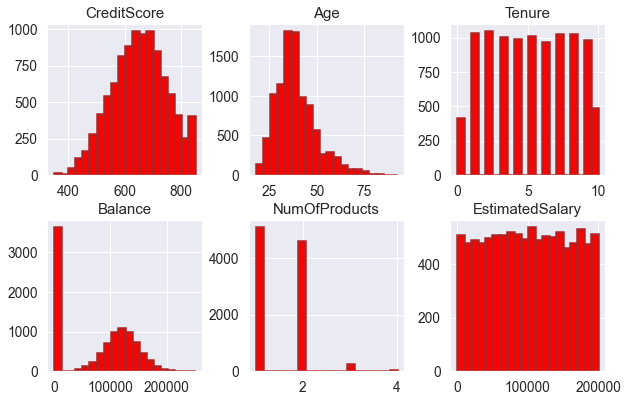

In [243]:
df[var_continuous].hist(figsize = (10, 10), bins = 20, layout = (3, 3), color = 'red', edgecolor = 'firebrick', linewidth = 2.5);
print("Before Fillter Outlier")

### Log Transformation

   CreditScore  Age  Tenure    Balance  NumOfProducts  EstimatedSalary
0          619   42       2       0.00              1        101348.88
1          608   41       1   83807.86              1        112542.58
2          502   42       8  159660.80              3        113931.57
3          699   39       1       0.00              2         93826.63
4          850   43       2  125510.82              1         79084.10


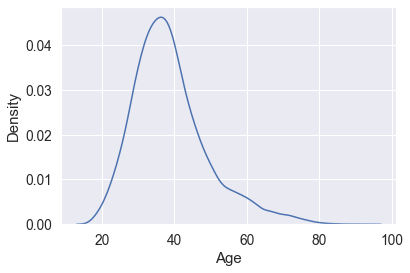

In [244]:
# dari histogram sebelumnya dapat dilihat bahwa feature Age positif skew, maka perlu sedikit dinormalisasi menggunakan log transform
# before 
print(df[var_continuous].head(5))
sns.kdeplot(df['Age']);

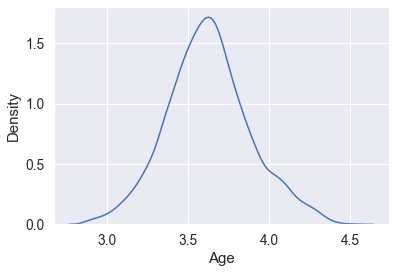

In [245]:
# after

sns.kdeplot(np.log(df['Age']));

In [246]:
df['Age'] = np.log(df['Age'])
print(df[var_continuous].head(5))

   CreditScore       Age  Tenure    Balance  NumOfProducts  EstimatedSalary
0          619  3.737670       2       0.00              1        101348.88
1          608  3.713572       1   83807.86              1        112542.58
2          502  3.737670       8  159660.80              3        113931.57
3          699  3.663562       1       0.00              2         93826.63
4          850  3.761200       2  125510.82              1         79084.10


In [264]:
print(df[var_continuous].sample(5))

      CreditScore       Age  Tenure    Balance  NumOfProducts  EstimatedSalary
4552          610  3.218876       2       0.00              2        123723.83
5779          684  3.688879       2   70291.02              1        115468.84
9309          678  4.418841       6  123356.63              1         92934.41
7916          562  3.496508       6       0.00              2        111590.35
7652          704  3.178054       2  148197.15              2        182775.08


### Normalisasi dengan Z-score

In [18]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in ['Balance','EstimatedSalary','CreditScore']:
    zscore = abs(stats.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries
    
df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 10000
Jumlah baris setelah memfilter outlier: 9992


### Checking Distribusi setiap Feature terhadap target

ValueError: num must be 1 <= num <= 15, not 16

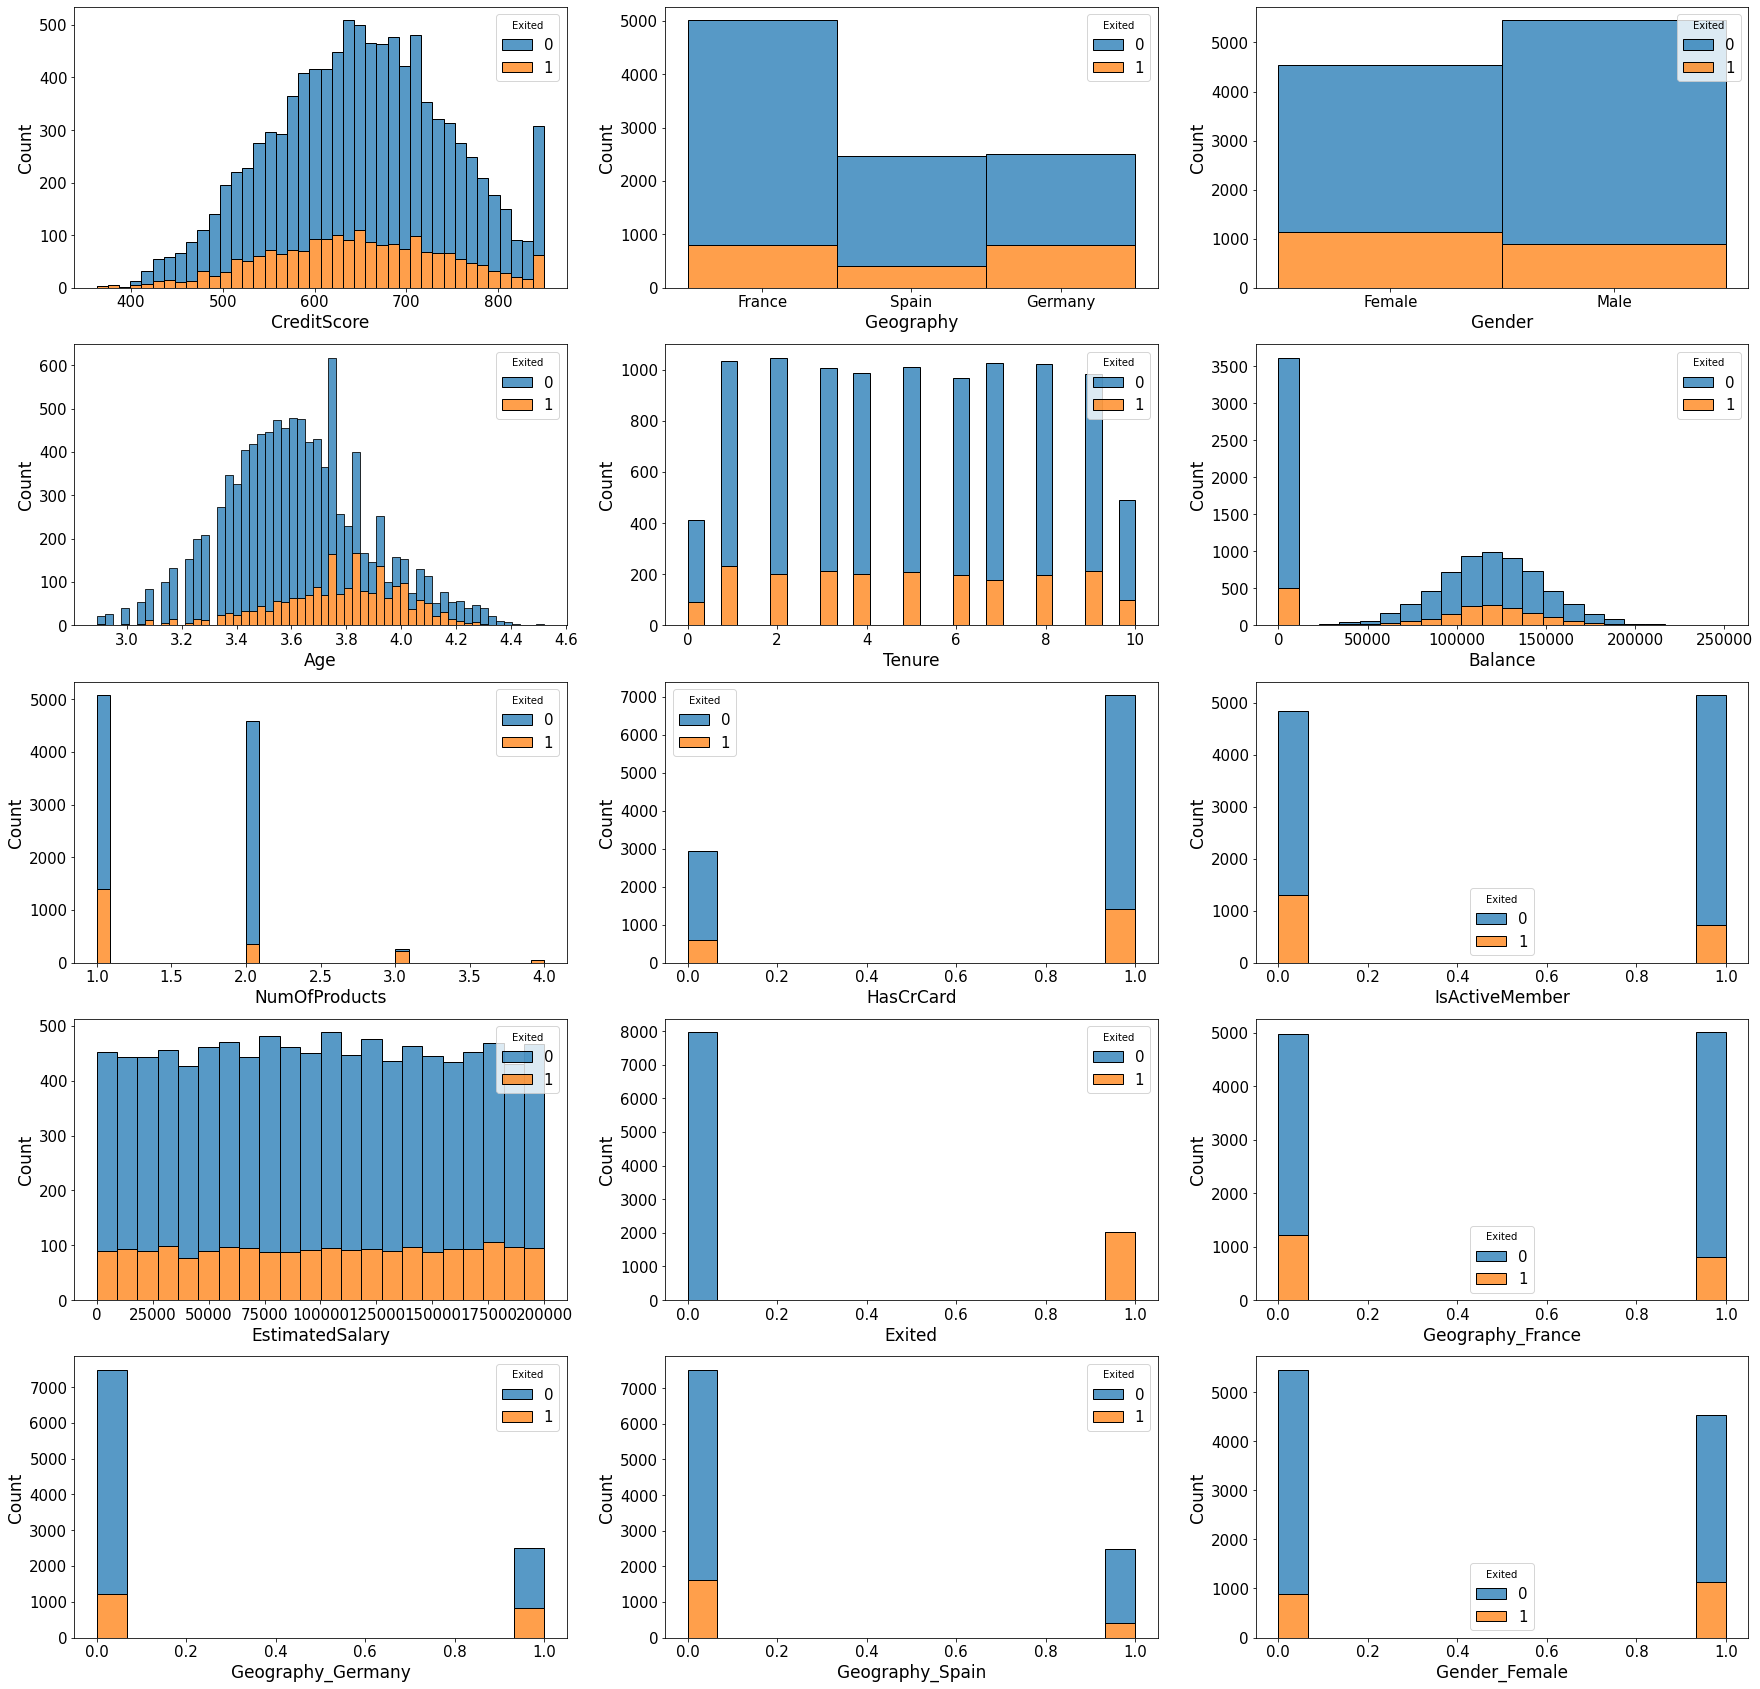

In [19]:
col=df.iloc[:,:-1]
plt.figure(figsize = (30,30))
for i in enumerate(col):
    plt.subplot(5,3, i[0]+1)
    _= sns.histplot(df, x=i[1], hue = 'Exited',multiple="stack")

plt.savefig('x1.png')

### Handle Outlier

<h3>Metode IQR</h3>

In [20]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in ['Tenure','Balance','EstimatedSalary','CreditScore']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries
    #house['SalePrice'] = np.where(house['SalePrice'] > (q3 + 1.5 * iqr), q3, house['SalePrice'])
df = df[filtered_entries]



print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 9992
Jumlah baris setelah memfilter outlier: 9985


In [21]:
var_continuous = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary','balance_salary_ratio','tenure_by_age','credit_score_by_age']
var_categorical = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']

var_target = ['Exited']

After Fillter Outlier


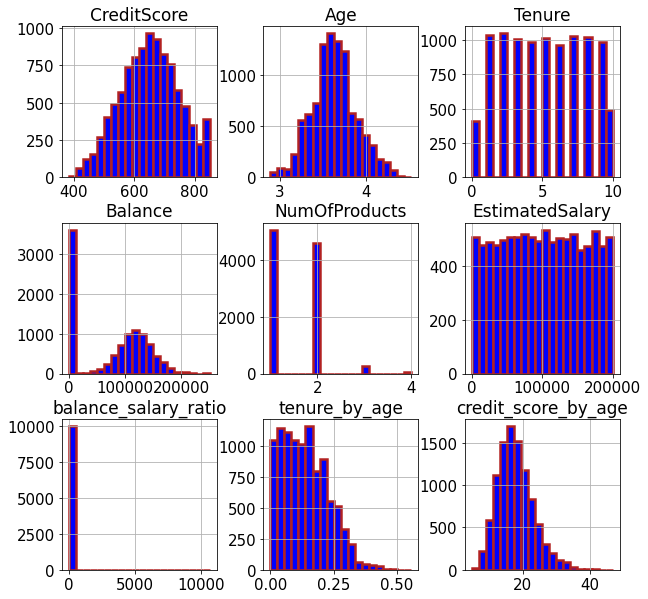

In [22]:
df[var_continuous].hist(figsize = (10, 10), bins = 20, layout = (3, 3), color = 'blue', edgecolor = 'firebrick', linewidth = 2.5);
print("After Fillter Outlier")

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,9985.0,650.963245,96.072231,383.000000,584.000000,652.000000,718.000000,850.000000
Age,9985.0,3.627455,0.258395,2.890372,3.465736,3.610918,3.784190,4.521789
Tenure,9985.0,5.014221,2.891501,0.000000,3.000000,5.000000,8.000000,10.000000
Balance,9985.0,76471.450508,62395.035420,0.000000,0.000000,97157.960000,127637.920000,250898.090000
NumOfProducts,9985.0,1.530195,0.580908,1.000000,1.000000,1.000000,2.000000,4.000000
HasCrCard,9985.0,0.705258,0.455950,0.000000,0.000000,1.000000,1.000000,1.000000
IsActiveMember,9985.0,0.515473,0.499786,0.000000,0.000000,1.000000,1.000000,1.000000
EstimatedSalary,9985.0,100033.186596,57519.380700,11.580000,50908.480000,100127.710000,149370.930000,199992.480000
Exited,9985.0,0.202504,0.401886,0.000000,0.000000,0.000000,0.000000,1.000000
Geography_France,9985.0,0.501552,0.500023,0.000000,0.000000,1.000000,1.000000,1.000000


In [24]:
var_continuous = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary','balance_salary_ratio','tenure_by_age','credit_score_by_age']
var_categorical = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']

var_target = ['Exited']

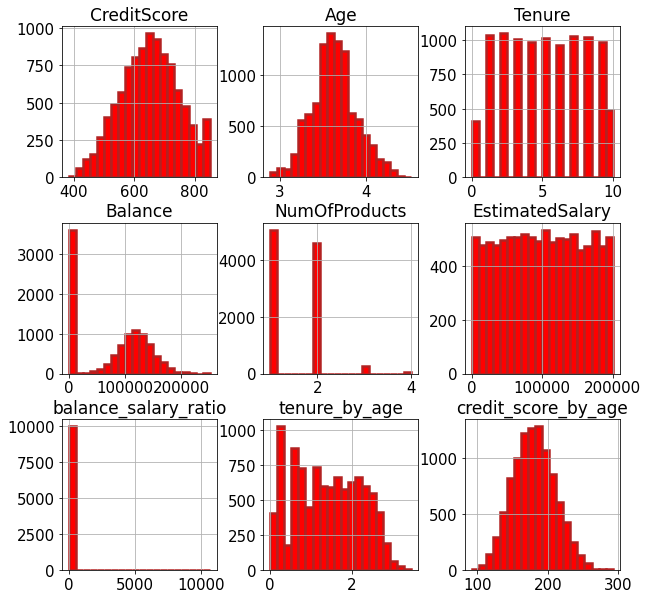

In [ ]:
df[var_continuous].hist(figsize = (10, 10), bins = 20, layout = (3, 3), color = 'red', edgecolor = 'firebrick', linewidth = 2.5);

### Checking Imbalance Data

In [25]:
df['Exited'].value_counts()

0    7963
1    2022
Name: Exited, dtype: int64

terjadi inbalance class pada dataset customer churn Butuh Pembuatan Model Machine Learning yang memiliki Akurasi Tinggi

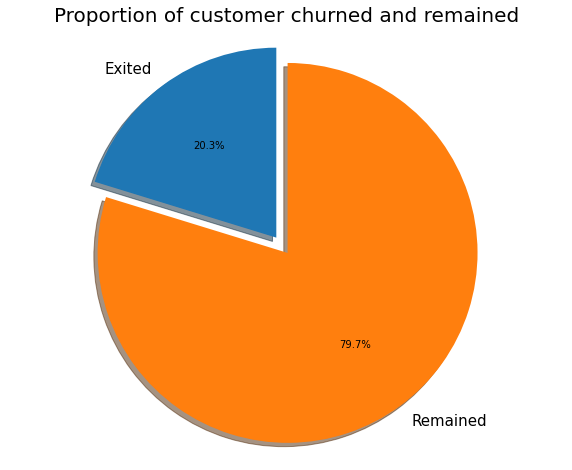

In [26]:
labels = 'Exited', 'Remained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and remained", size = 20)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9985 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CreditScore           9985 non-null   int64  
 1   Geography             9985 non-null   object 
 2   Gender                9985 non-null   object 
 3   Age                   9985 non-null   float64
 4   Tenure                9985 non-null   int64  
 5   Balance               9985 non-null   float64
 6   NumOfProducts         9985 non-null   int64  
 7   HasCrCard             9985 non-null   int64  
 8   IsActiveMember        9985 non-null   int64  
 9   EstimatedSalary       9985 non-null   float64
 10  Exited                9985 non-null   int64  
 11  Geography_France      9985 non-null   uint8  
 12  Geography_Germany     9985 non-null   uint8  
 13  Geography_Spain       9985 non-null   uint8  
 14  Gender_Female         9985 non-null   uint8  
 15  Gender_Male          

## EDA, Insight, & Visualization

## CORRELATION

In [306]:
var_continuous = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary','balance_salary_ratio','tenure_by_age','credit_score_by_age']
var_categorical = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']

var_target = ['Exited']

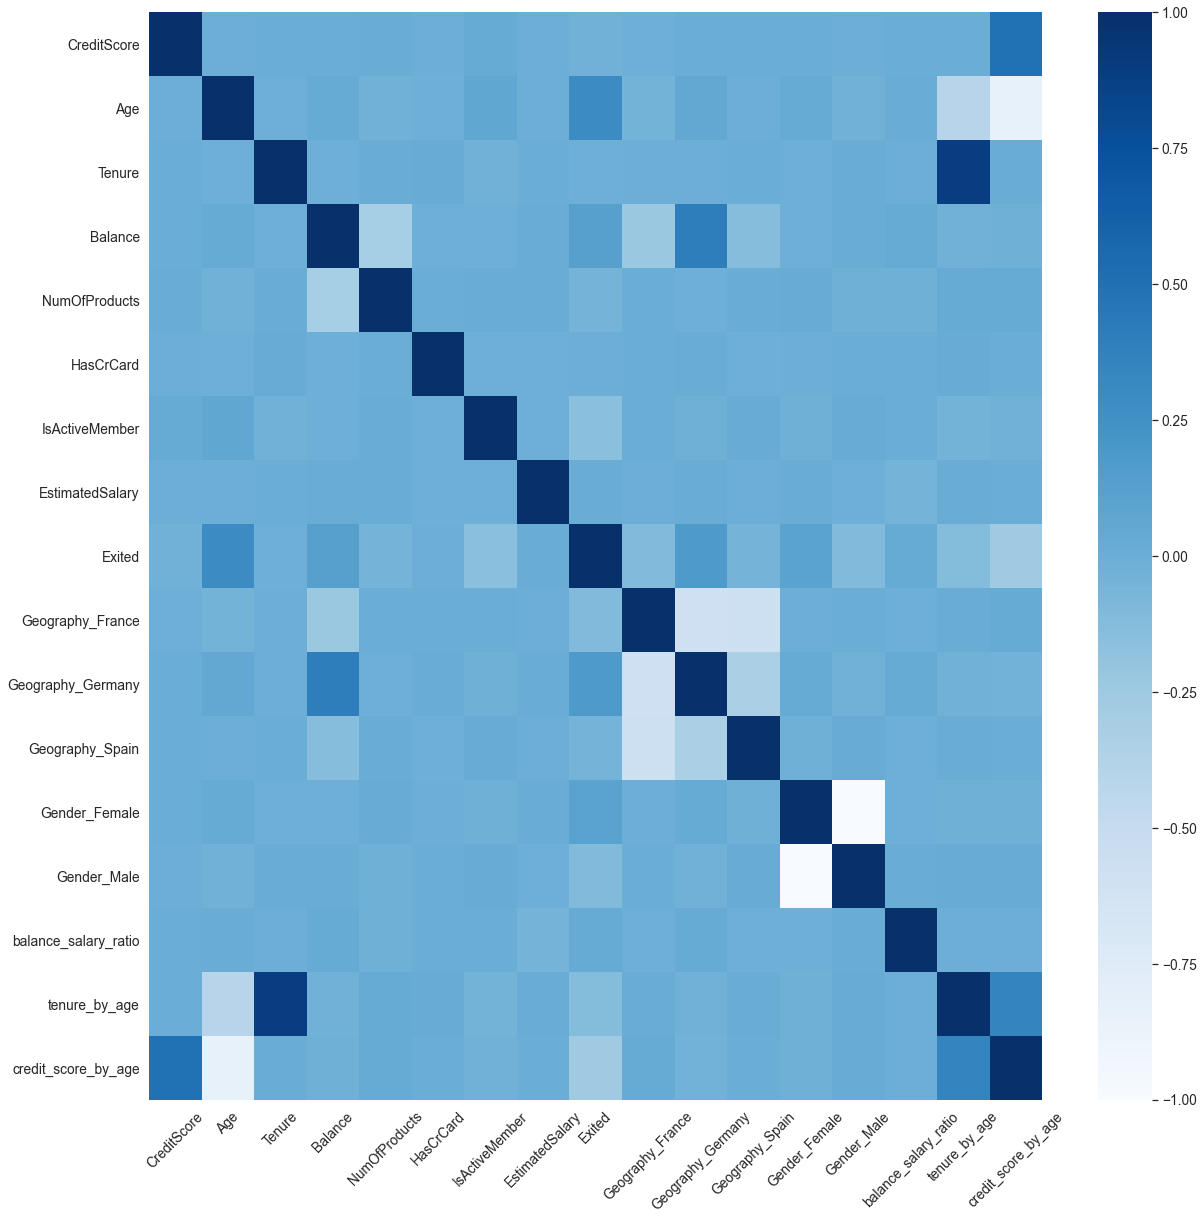

In [305]:
plt.figure(figsize = (20, 20))
ax = sns.heatmap(df.corr(), annot = False, annot_kws = {'fontsize': 24}, cmap = 'Blues', fmt='.2f')

ax.tick_params(axis = 'x', rotation = 45)
ax.tick_params(axis = 'y', rotation = 360);

Melihat Presentase Total Customer yang Churn pada dataset 

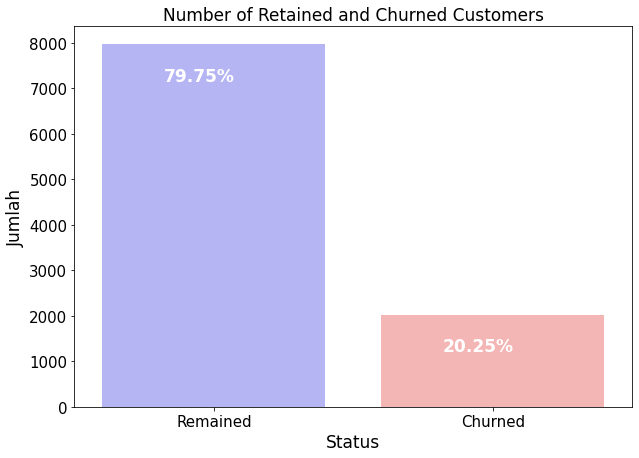

In [ ]:
colors = ['#00A5E0', '#DD403A']

fig = plt.figure(figsize = (10, 7))
sns.countplot(x = 'Exited', data = df, palette = 'bwr')

for index, value in enumerate(df['Exited'].value_counts()):
    label =  '{}%'.format(round( (value/df['Exited'].shape[0])*100, 2)) 
    plt.annotate(label, xy = (index - 0.18, value - 800), color = 'w', fontweight = 'bold', size = label_size)

plt.title('Number of Retained and Churned Customers')
plt.xticks([0, 1], ['Remained', 'Churned'])
plt.xlabel('Status')
plt.ylabel('Jumlah');

<strong> Inisght Pertama adalah bahwa 20.37% persen Customer Cenderung Churn dan 79.63% sisanya bertahan </strong>

Analisa Variabel Continous pada Churn target  

## Analisa Variabel Katagorical pada Y Target (Churn)  

## BERAPA PRESENTASE CUSTOMER CHURN PADA SETIAP NEGARA?

C:\Users\SPASI\anaconda3\envs\spasi_nlp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


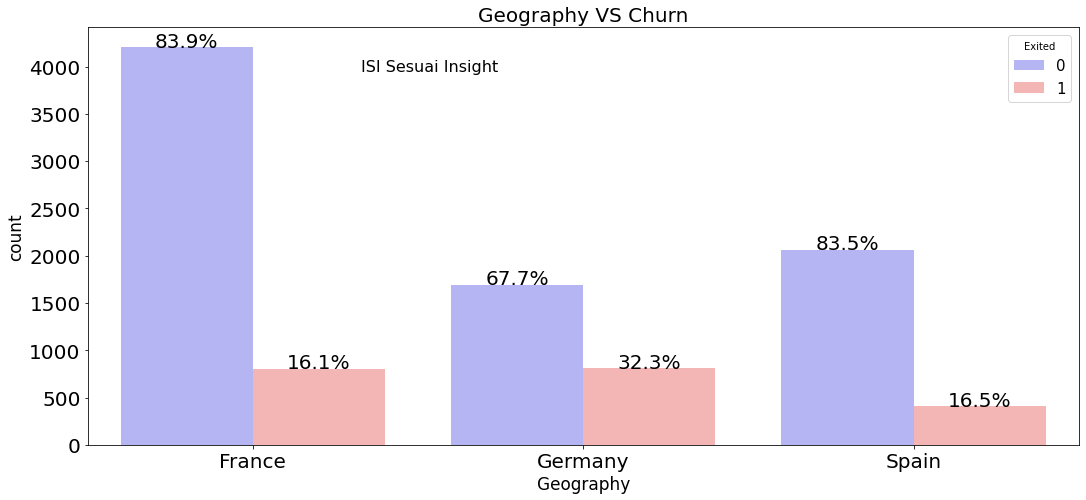

In [173]:
totals = df['Geography'].value_counts()
n_hues = df['Exited'].unique().size

fig, ax = plt.subplots(figsize = (15,7))
ax = sns.countplot(df.Geography,hue=df['Exited'],order=totals.index,palette= 'bwr')

text = '''ISI Sesuai Insight'''
fig.text(x=0.325, y=0.85, s = text, fontsize=16)


plt.title("Geography VS Churn",fontsize=20)
plt.tight_layout()


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
temp_totals = totals.values.tolist()*n_hues
for p,t in zip(ax.patches,temp_totals):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
        height + 3,
        '{0:.1%}'.format(height/t),
        ha="center", fontsize=20)

In [ ]:
totals = df['Geography'].value_counts()
n_hues = df['Exited'].unique().size

fig, ax = plt.subplots(figsize = (15,7))
ax = sns.countplot(df.Geography,hue=df['Exited'],order=totals.index,palette= 'bwr')

text = '''ISI Sesuai Insight'''
fig.text(x=0.325, y=0.85, s = text, fontsize=16)


plt.title("Geography VS Churn",fontsize=20)
plt.tight_layout()


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
temp_totals = totals.values.tolist()*n_hues
for p,t in zip(ax.patches,temp_totals):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
        height + 3,
        '{0:.1%}'.format(height/t),
        ha="center", fontsize=20)

## Berapakah Presentase GENDER CUSTOMER UNTUK CHURN?

C:\Users\SPASI\anaconda3\envs\spasi_nlp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


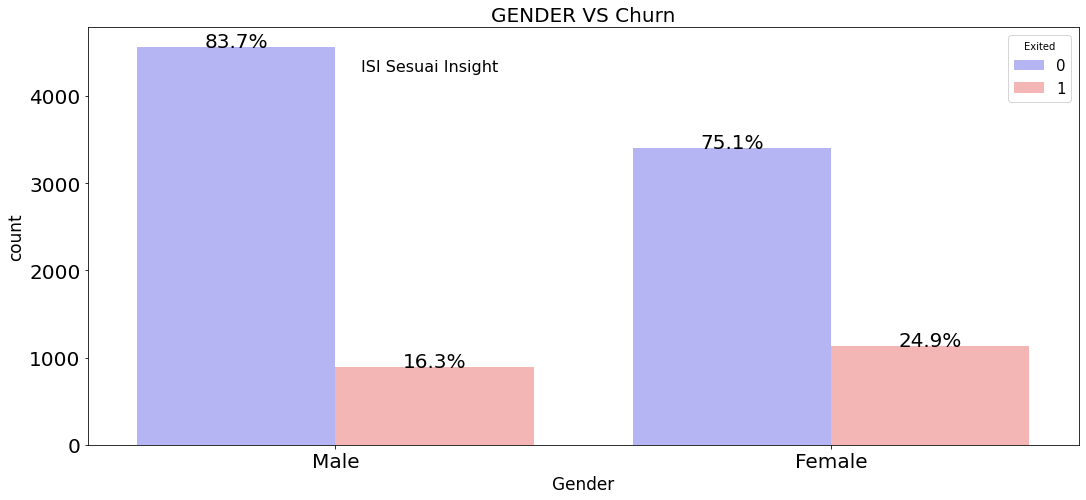

In [174]:
totals = df['Gender'].value_counts()
n_hues = df['Exited'].unique().size

fig, ax = plt.subplots(figsize = (15,7))

text = '''ISI Sesuai Insight'''
fig.text(x=0.325, y=0.85, s = text, fontsize=16)


ax = sns.countplot(df.Gender,hue=df['Exited'],order=totals.index,palette= 'bwr')

plt.title("GENDER VS Churn",fontsize=20)
plt.tight_layout()



plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
temp_totals = totals.values.tolist()*n_hues
for p,t in zip(ax.patches,temp_totals):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
        height + 3,
        '{0:.1%}'.format(height/t),
        ha="center", fontsize=20)

Text(0.5, 0.98, 'Berdasarkan Negara')

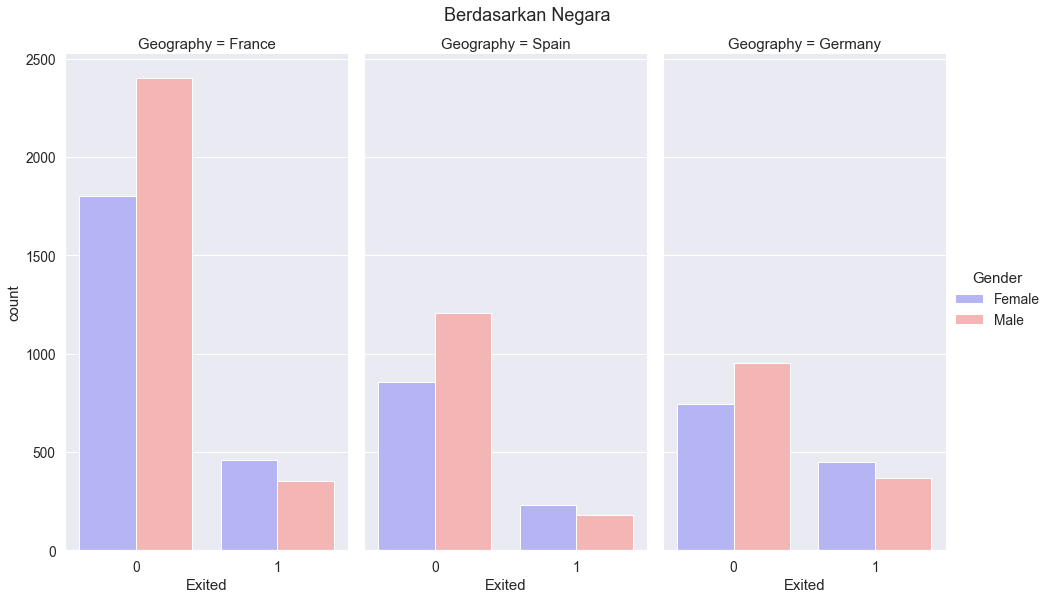

In [343]:
ax = sns.catplot(x='Exited', hue='Gender', col='Geography', data=df, kind='count',height=8.27, aspect=8/15,palette= 'bwr')
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Berdasarkan Negara')


## Berapakah Presentase customer Aktif UNTUK CHURN?

C:\Users\SPASI\anaconda3\envs\spasi_nlp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


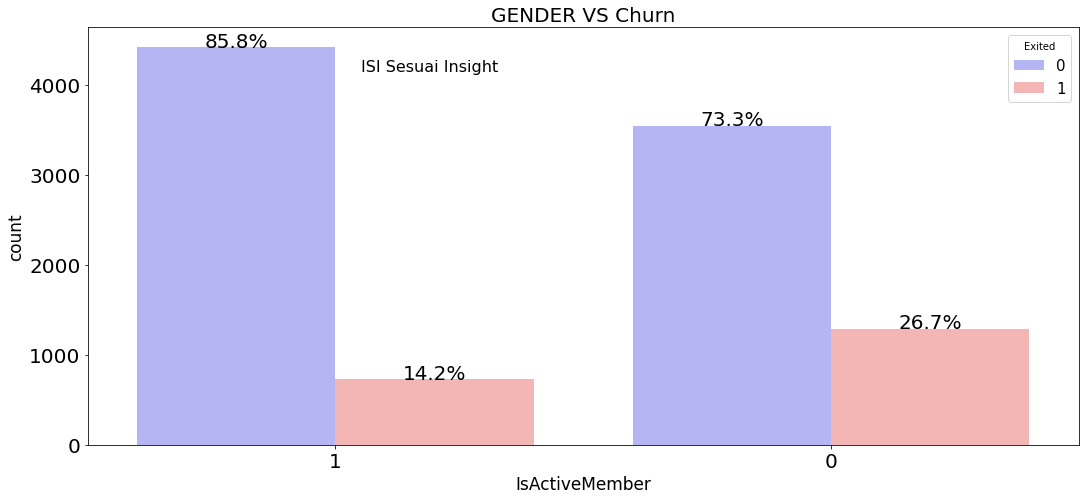

In [175]:
totals = df['IsActiveMember'].value_counts()
n_hues = df['Exited'].unique().size

fig, ax = plt.subplots(figsize = (15,7))

text = '''ISI Sesuai Insight'''
fig.text(x=0.325, y=0.85, s = text, fontsize=16)



ax = sns.countplot(df.IsActiveMember,hue=df['Exited'],order=totals.index,palette= 'bwr')

plt.title("GENDER VS Churn",fontsize=20)
plt.tight_layout()



plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
temp_totals = totals.values.tolist()*n_hues
for p,t in zip(ax.patches,temp_totals):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
        height + 3,
        '{0:.1%}'.format(height/t),
        ha="center", fontsize=20)

## Berapakah Presentase kustomer yang memiliki kartu UNTUK CHURN?

C:\Users\SPASI\anaconda3\envs\spasi_nlp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


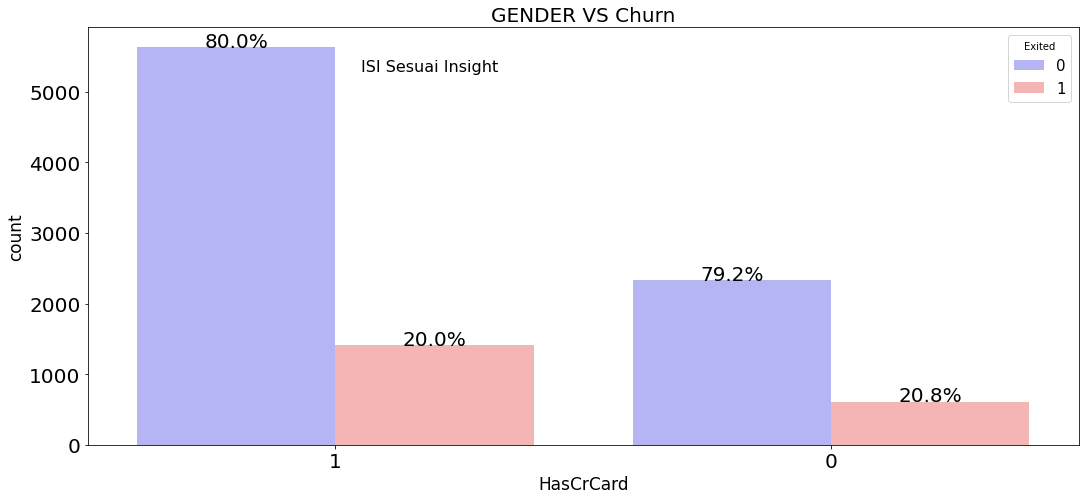

In [176]:
totals = df['HasCrCard'].value_counts()
n_hues = df['Exited'].unique().size

fig, ax = plt.subplots(figsize = (15,7))

text = '''ISI Sesuai Insight'''
fig.text(x=0.325, y=0.85, s = text, fontsize=16)



ax = sns.countplot(df.HasCrCard,hue=df['Exited'],order=totals.index,palette= 'bwr')

plt.title("GENDER VS Churn",fontsize=20)
plt.tight_layout()



plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
temp_totals = totals.values.tolist()*n_hues
for p,t in zip(ax.patches,temp_totals):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
        height + 3,
        '{0:.1%}'.format(height/t),
        ha="center", fontsize=20)

## Berapakah Presentase kustomer yang  CHURN berdasarkan segment credit nya?

In [ ]:
df_eda = df

df_eda['segment_score'] = pd.cut(df['CreditScore'],
                    bins=[0,550,700,900],
                    labels=['Poor', 'Average', 'Good'])

C:\Users\SPASI\anaconda3\envs\spasi_nlp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


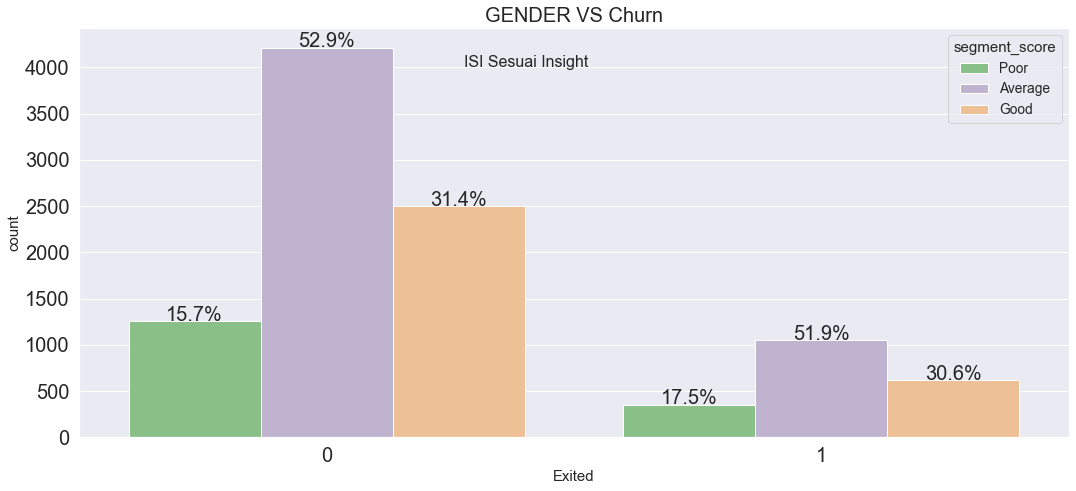

In [222]:
totals = df_eda['Exited'].value_counts()
n_hues = df_eda['segment_score'].unique().size

fig, ax = plt.subplots(figsize = (15,7))

text = '''ISI Sesuai Insight'''
fig.text(x=0.425, y=0.85, s = text, fontsize=16)



ax = sns.countplot(df_eda.Exited,hue=df_eda['segment_score'],order=totals.index,palette= 'Accent')

plt.title("GENDER VS Churn",fontsize=20)
plt.tight_layout()



plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
temp_totals = totals.values.tolist()*n_hues
for p,t in zip(ax.patches,temp_totals):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
        height + 3,
        '{0:.1%}'.format(height/t),
        ha="center", fontsize=20)

## Berapakah Presentase kustomer yang  CHURN berdasarkan segment umur?

In [279]:
df_eda = pd.read_csv('Churn_Modelling.csv')

In [280]:
df_eda['segment_age'] = pd.cut(df_eda['Age'],
                     bins=[17,35,50,65,93],
                     labels=['Young under 17-34', 'Middle-aged 35-50', 'Senior 51-65', 'Very-old over 65'])

C:\Users\SPASI\anaconda3\envs\spasi_nlp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


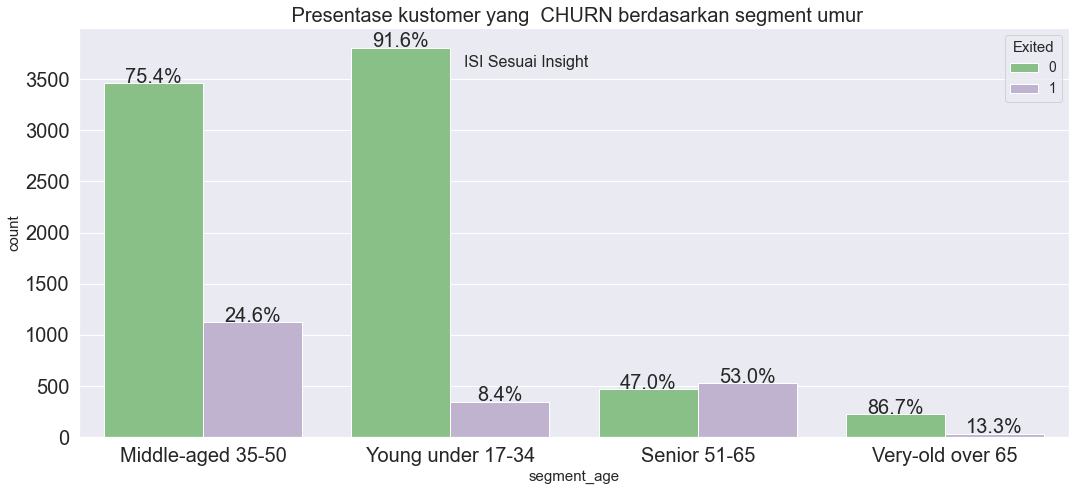

In [282]:
totals = df_eda['segment_age'].value_counts()
n_hues = df_eda['Exited'].unique().size

fig, ax = plt.subplots(figsize = (15,7))

text = '''ISI Sesuai Insight'''
fig.text(x=0.425, y=0.85, s = text, fontsize=16)



ax = sns.countplot(df_eda.segment_age,hue=df_eda['Exited'],order=totals.index,palette= 'Accent')

plt.title(" Presentase kustomer yang  CHURN berdasarkan segment umur",fontsize=20)
plt.tight_layout()



plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
temp_totals = totals.values.tolist()*n_hues
for p,t in zip(ax.patches,temp_totals):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
        height + 3,
        '{0:.1%}'.format(height/t),
        ha="center", fontsize=20)

## Analisa Variabel Numerik pada Y Target (Churn)  

C:\Users\SPASI\anaconda3\envs\spasi_nlp\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\SPASI\anaconda3\envs\spasi_nlp\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


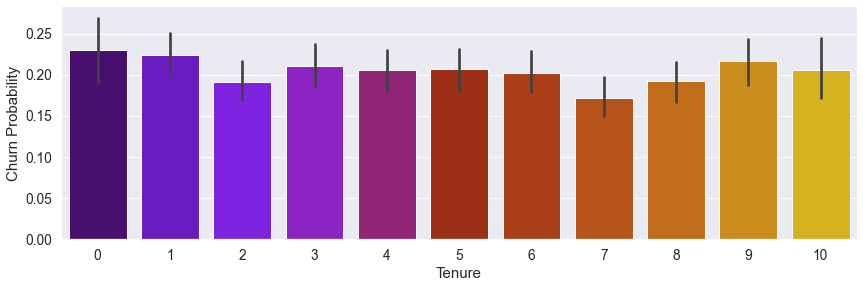

In [367]:
ax = sns.factorplot(x = "Tenure", y = "Exited", data = df, kind = "bar", size=4, aspect=3,palette= 'gnuplot')
ax.set_ylabels("Churn Probability")
plt.show()

Text(0.5, 1.0, 'Boxplot- Credit Score Column')

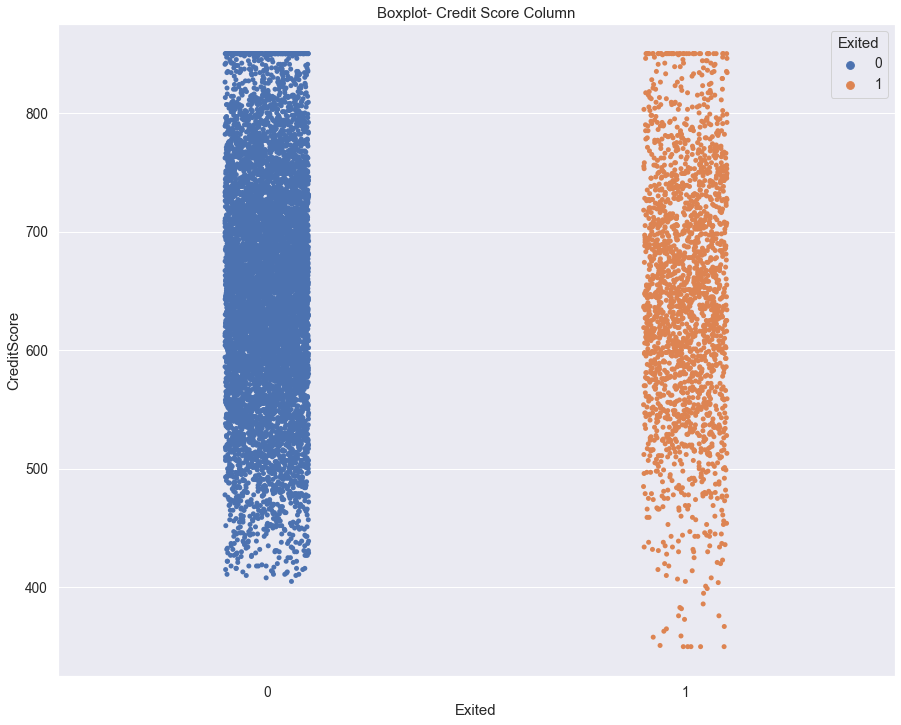

In [371]:
fig, axarr = plt.subplots(figsize=(15, 12))
sns.stripplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr).set_title('Boxplot- Credit Score Column')

Text(0.5, 1.0, 'Boxplot- Age Column')

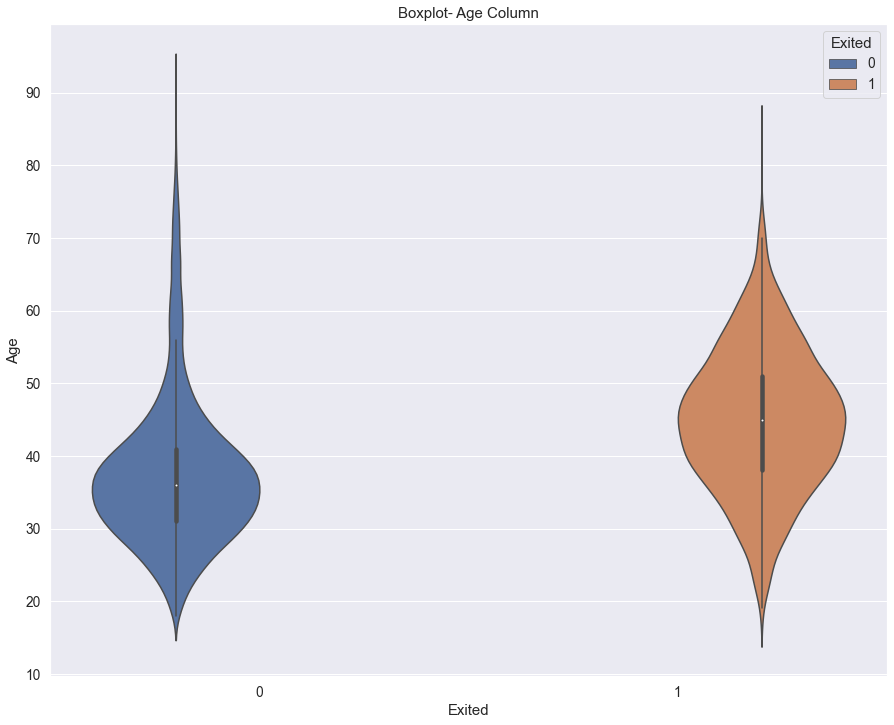

In [376]:
fig, axarr = plt.subplots(figsize=(15, 12))
sns.violinplot(y='Age',x = 'Exited', hue = 'Exited',data = df_eda, ax=axarr).set_title('Boxplot- Age Column')

(-1.0, 5.0)

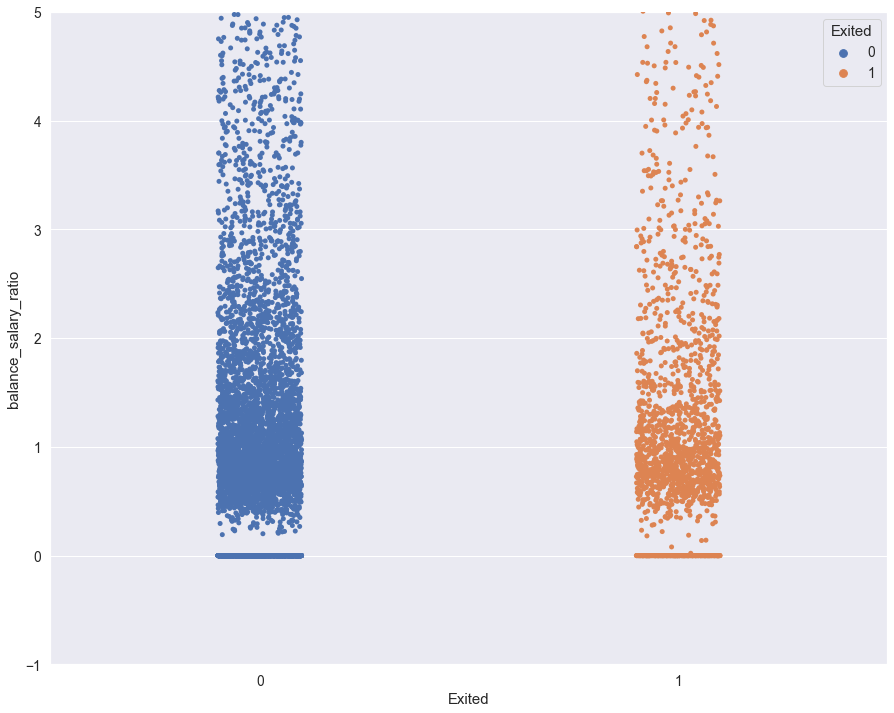

In [380]:
fig, axarr = plt.subplots(figsize=(15, 12))
sns.stripplot(y='balance_salary_ratio',x = 'Exited', hue = 'Exited',data = df,ax=axarr)
plt.ylim(-1, 5)

(-0.2, 0.7)

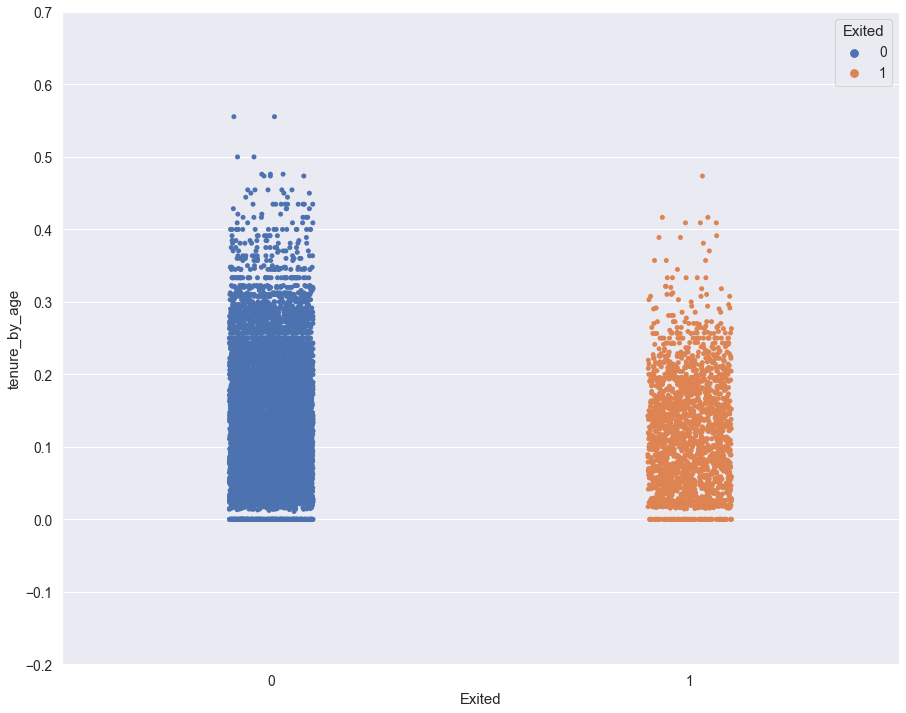

In [387]:
fig, axarr = plt.subplots(figsize=(15, 12))
sns.stripplot(y='tenure_by_age',x = 'Exited', hue = 'Exited',data = df,ax=axarr)
plt.ylim(-0.2, 0.7)

<h2>Insight yang di dapatkan</h2>

<ul>
  <li>Customer yang berusia rata2 30-50 an cenderung churn</li>
  <li>faktor usia customer berpengaruh signifikan terhadap churn</li>
  <li>Tidak ada perbedaan signifikan pada Salary, NumofProducts dan CreditScore terhadap churn atau tidak nya customer</li>
  <li>Customer yang tenure nya tinggi maupun yang rendah cenderung banyak churn  </li>
  <li>Customer yang memiliki saldo yang banyak cenderung untuk churn dari pada customer yang memiliki saldo di bank sebesar 0 dan tidak churn</li>


</ul>  


<h2>Machine Learning Modelling & Evaluation<h2>